# CodSoft DataScience Internship
## Task 4: SALES PREDICTION USING PYTHON

importing necessary libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset in pandas DataFrame


In [3]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
# Checking the null rows
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

We can see all the rows are free from null values. The data wrangling process is not required for this dataset.


## Exploratory data analysis and Data Visualization

In [9]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [25]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


The correlation between Tv, Radio and Newspaper with Sales can be seen from above output.
The most correlated variable is TV and Sales with 0.901208. Which is high positive correlation.

(0.0, 28.27)

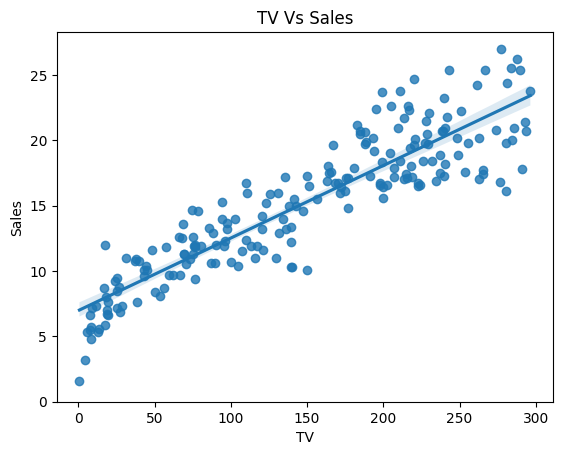

In [13]:
# Scatter plot between TV and Sales
sns.regplot(x='TV',y='Sales',data = df)
plt.title('TV Vs Sales')
plt.ylim(0,)

Tv Advertisement is Potential predictor of sales.

(0.0, 28.27)

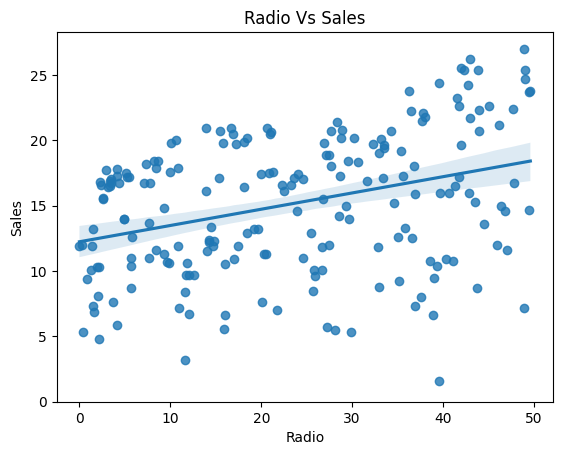

In [16]:
# Scatter plot between Radio and Sales
sns.regplot(x='Radio',y='Sales',data = df)
plt.title('Radio Vs Sales')
plt.ylim(0,)

(0.0, 28.27)

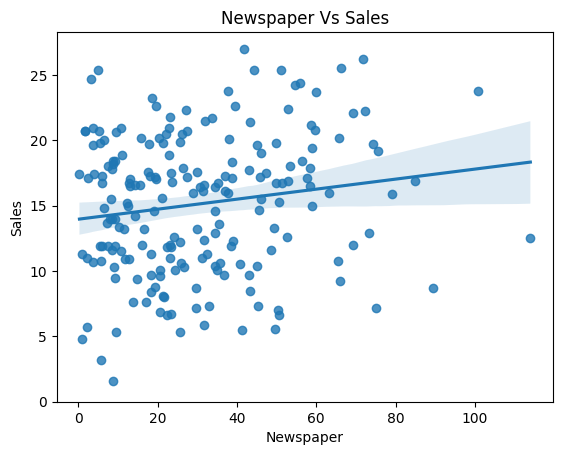

In [17]:
# Scatter plot between Newspaper and Sales
sns.regplot(x='Newspaper',y='Sales',data = df)
plt.title('Newspaper Vs Sales')
plt.ylim(0,)

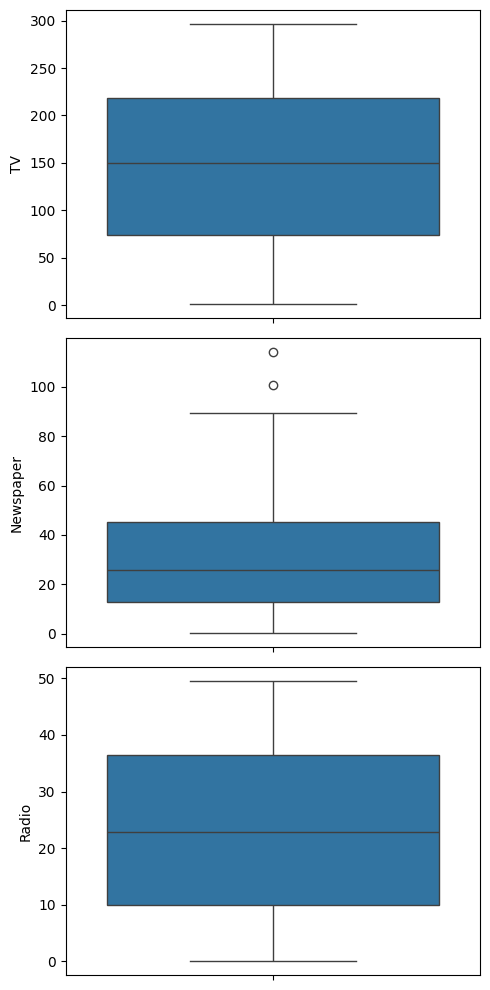

In [28]:
fig, axs = plt.subplots(3, figsize = (5,10))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])

plt.tight_layout()

# Model Development

## 1.Simple Linear Regression

Since the Correlation between Sales and TV advertisement is Highly positive among other advertisement platform.


Using TV  independent variable and Sales as dependent variable for the linearRegression model

In [40]:
# Import libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [41]:
# preparing Dataset
X = df[['TV']]
Y = df['Sales']

In [42]:
# splitting data into training and testing set
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [44]:
print('Number of train samples :',x_train.shape[0])
print('Number of test samples :',x_test.shape[0])

Number of train samples : 160
Number of test samples : 40


In [53]:
linearReg = LinearRegression()

In [54]:
# fitting the data
linearReg.fit(x_train,y_train)

LinearRegression()

In [69]:
prediction = linearReg.predict(x_test)
prediction

array([18.83354336, 14.3845077 , 19.14693455, 22.31442409,  9.30868965,
       20.3445366 , 14.33414125, 16.34320264, 11.75985647, 17.51282334,
       21.44140577, 19.80729456, 11.04353375, 13.70735887, 21.02168543,
       22.82368478, 21.68204544, 16.02421518,  9.22474558, 18.7663881 ,
       20.23820745, 22.49910104, 20.42848067, 12.17398054, 20.24380372,
       19.66179151, 16.65099756, 10.03620492, 18.2403386 ,  9.02887609,
       11.09390019, 10.69096866, 18.39143793, 16.61741993, 16.40476163,
        7.90402556, 19.26445625, 10.64619849, 19.04620167, 12.96305479])

##### Model Evaluation

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [77]:
# Mean Scored Error
mse = mean_squared_error(y_test,prediction)
print("MSE value is :",mse)

MSE value is : 5.120302247243683


In [78]:
# Mean absolute error
mae = mean_absolute_error(y_test,prediction)
print("MAE value is :",mae)

MAE value is : 1.7821626397750951


In [79]:
r2scor = r2_score(y_test,prediction)
print('rsquare value is', r2scor)

rsquare value is 0.7581562511357189


## 2. MultiLinear Regression model

In [85]:
# Preparing data 
X_data = df[['TV','Newspaper','Radio']]
Y_data = df[['Sales']]

In [86]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size=0.2,random_state=4)

In [87]:
mlr = LinearRegression()

In [88]:
# fitting the model
mlr.fit(X_train,Y_train)

LinearRegression()

In [89]:
SalePrediction = mlr.predict(X_test)

#### Model Evaluation


In [93]:
print("Mean squared error is ",mean_squared_error(Y_test,SalePrediction))
print("R2 error is ",r2_score(Y_test,SalePrediction))
print("Mean Absolute error is ",mean_absolute_error(Y_test,SalePrediction))

Mean squared error is  2.0189265528796403
R2 error is  0.9046414171169503
Mean Absolute error is  1.10511244904752


we have R2 value 0.90 which is very good for prediction Sales

## 3. Support Vector Regression Model

In [95]:
from sklearn.svm import SVR
svr = SVR()

In [99]:
# Train the model above train dataset
svr.fit(x_train,y_train)


SVR()

In [104]:
srvPrediction = svr.predict(x_test)

In [105]:
print(srvPrediction)

[19.30529055 14.61711907 19.4987395  20.01855513  9.13184433 19.99428562
 14.56206662 16.91026691 11.980133   18.20090756 20.12684223 19.81881235
 11.21253111 13.90147567 20.11135892 19.86643083 20.11603949 16.5309917
  9.03130002 19.26031954 19.96544607 19.97101146 20.01502914 12.39659177
 19.96703567 19.75833771 17.26887919 10.0226043  18.86542259  8.80079184
 11.26877815 10.80911094 18.98651855 17.23023745 16.98270376  7.68343243
 19.56433111 10.75672399 19.43950566 13.16413622]


#### Model Evaluation

In [106]:
print("MSE:",mean_squared_error(y_test,srvPrediction))
print("MAE:",mean_absolute_error(y_test,srvPrediction))
print("R2:",r2_score(y_test,srvPrediction))

MSE: 5.469171570935096
MAE: 1.7714952345476962
R2: 0.7416783439671146


# Conclusions

From the above three models the value of r2 score is large in the MultiLinearRegression(0.90) than other Models. so MultilinearRegression Model is best suitable for predicting the value of Sales .

# Author
<h3>Suresh Tamang</h3>
<h3>Internship ID:CS11WX331283</h3>